In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav

import tol_colors
from scipy.interpolate import interp1d
from scipy.signal import convolve
#from labellines import *
import scipy

In [102]:
import astropy.units as u
from astropy.coordinates import SpectralCoord
import astropy
def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu

def veltrans2(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu2

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)

def gaussian_psf(x, fwhm):
	#x = wavelength [nm]
	# fwhm in [nm]
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))  # Calculate sigma from FWHM
    tr = np.exp(-(x)**2 / (2 * (sigma**2)))
    tr /= tr.sum()
    return tr
#write adjustment for point spread function from atlas
def psf_adjust(wlsel,ilamsel,fwhm,new_dispersion_range,ntw,gaussian_psf):
    func=interp1d(wlsel,ilamsel,kind='linear',fill_value='extrapolate')
    yatlas = func(new_dispersion_range)
    dw=new_dispersion_range[1]-new_dispersion_range[0]
    dw=dw
    tw=(np.arange(ntw)-ntw//2)*dw
    
    for i in range(1):

    	psf = gaussian_psf(tw, fwhm) # guassian transmission profiles
    	yconv = convolve(yatlas, psf, mode='same', method='fft')
        
    return yconv


def doppler_to_wavelength(vel, rest_wave=396.847, speed_of_light=299792458):
    """
    Converts a Doppler shift (observed frequency) to wavelength.

    Args:
        observed_frequency (float or array-like): The observed frequency of the wave.
        rest_frequency (float): The rest frequency of the wave (frequency at the source).
        speed_of_light (float, optional): The speed of light in m/s. Defaults to 299792458 m/s.

    Returns:
         float or array-like: The wavelength corresponding to the observed frequency.
    """

    delwave = -rest_wave*vel*1000/speed_of_light
    return delwave

def doppler_shift(observed_wavelength, source_wavelength, speed_of_light=299792.458):
    """
    Calculates the Doppler shift (z) and radial velocity (v) given observed and source wavelengths.

    Args:
        observed_wavelength (float or numpy.ndarray): Observed wavelength(s).
        source_wavelength (float): Wavelength in the rest frame of the source.
        speed_of_light (float, optional): Speed of light in km/s. Defaults to 299792.458 km/s.

    Returns:
        tuple: A tuple containing:
            - doppler_shift (float or numpy.ndarray): The calculated Doppler shift (z).
            - radial_velocity (float or numpy.ndarray): The calculated radial velocity (v) in km/s.
    """
    doppler_shift = (observed_wavelength - source_wavelength) / source_wavelength
    radial_velocity = doppler_shift * speed_of_light
    return doppler_shift, radial_velocity

def doppler_shift_to_wavelength(observed_wavelength, velocity):
    """
    Converts observed wavelength to rest wavelength using the Doppler shift formula.

    Parameters:
        observed_wavelength: The observed wavelength in Angstroms (u.AA)
        velocity: The velocity of the object in km/s (u.km/s)

    Returns:
        rest_wavelength: The rest wavelength in Angstroms (u.AA)
    """

    observed_wavelength = observed_wavelength * u.nm
    velocity = velocity * u.km / u.second

    rest_wavelength = (observed_wavelength / (1 + velocity / astropy.constants.c)) - observed_wavelength

    return rest_wavelength.to(u.nm)

In [104]:
#general script many times
times = np.arange(60)

kr=16 #specify ca II H
lamb0=396.847 # change this and the instances below to wavelength of spectral line in nm as desired (as needed)
c=2.99e5
mu=.5 #viewing angle cos(theta) - choose between 0.05, 0.23, 0.5, 0.77, 0.95
muind = 2 # index corresponding to the value above; 0=0.05, 1=0.23, 2=0.5, 3=0.77, 4=0.95
fwhm=.05 #dkist FWHM
ntw=45 # DKIST NTW

#ncol2 = len(timesinit)#+len(times2)
#map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
#cmap_choice2 = map(np.linspace(0,1,ncol2))

#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Grid_For_Rahul/15_8_5e10_wRC.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/15_8_5e10_120_600.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/11Aug2024_Cclass.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/15_8_1e11_longdur_out.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/longdur_15_8_1e10.sav'
filename_updatedradyn = '/Users/coletamburri/Desktop/15_8_5e10_20_600.sav'
readradyn = readsav(filename_updatedradyn)


q = readradyn['q']
nq = readradyn['nq']
qnorm= readradyn['qnorm']
outintt = readradyn['outintt']
#nmu_new = readradyn['nmu']
nmu = 5
ne1t = readradyn['ne1t']
tg1t = readradyn['tg1t']
z1t = readradyn['z1t']
timet = readradyn['timet']
vz1t = readradyn['vz1t']

In [6]:
timet

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [56]:
caii_h = outintt_new[:,16,3,1:nq_new[16]]
halpha = outintt_new[:,2,3,:]
hbeta = outintt_new[:,4,3,:]
hgamma = outintt_new[:,5,3,:]


In [57]:
np.shape(q_new[16,0:nq_new[16]-1])

(100,)

In [58]:
8*60

480

In [59]:
freq = q_new[16,0:nq_new[16]-1]*qnorm_new

(0.0, 5.5e-05)

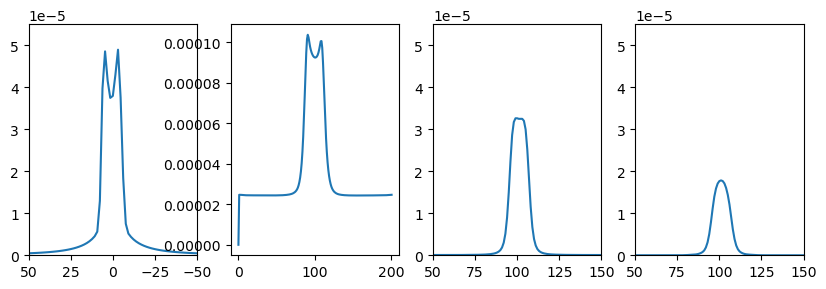

In [61]:
t = 500
fig,ax=plt.subplots(1,4,figsize=(10,3))
ax.flatten()[0].plot(freq,(caii_h[t,:]-caii_h[0,:]))
ax.flatten()[1].plot(halpha[2,:])

ax.flatten()[2].plot(hbeta[t,:]-hbeta[0,:])
ax.flatten()[3].plot(hgamma[t,:]-hgamma[0,:])

ax.flatten()[0].set_xlim([-50,50])
#ax.flatten()[1].set_xlim([50,150])
ax.flatten()[2].set_xlim([50,150])
ax.flatten()[3].set_xlim([50,150])

ax.flatten()[0].invert_xaxis()
ax.flatten()[0].set_ylim([0,5.5e-5])
#ax.flatten()[1].set_ylim([0,5.5e-5])
ax.flatten()[2].set_ylim([0,5.5e-5])
ax.flatten()[3].set_ylim([0,5.5e-5])



(0.0, 610.0)

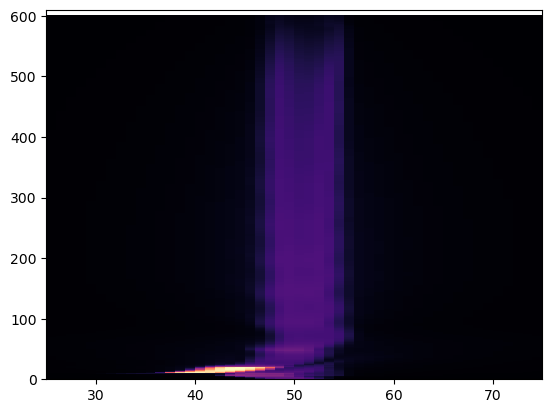

In [31]:
plt.pcolormesh(caii_h[:]-caii_h[0,:],cmap='magma')
plt.xlim([25,75])
plt.ylim([0,610])

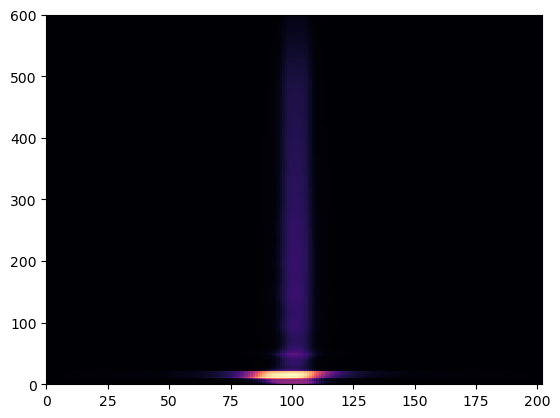

In [32]:
plt.pcolormesh(hbeta[0:600]-hbeta[0,:],cmap='magma')
#plt.xlim([25,75])

In [35]:
samples = np.arange(1,600,10)
samples

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591])

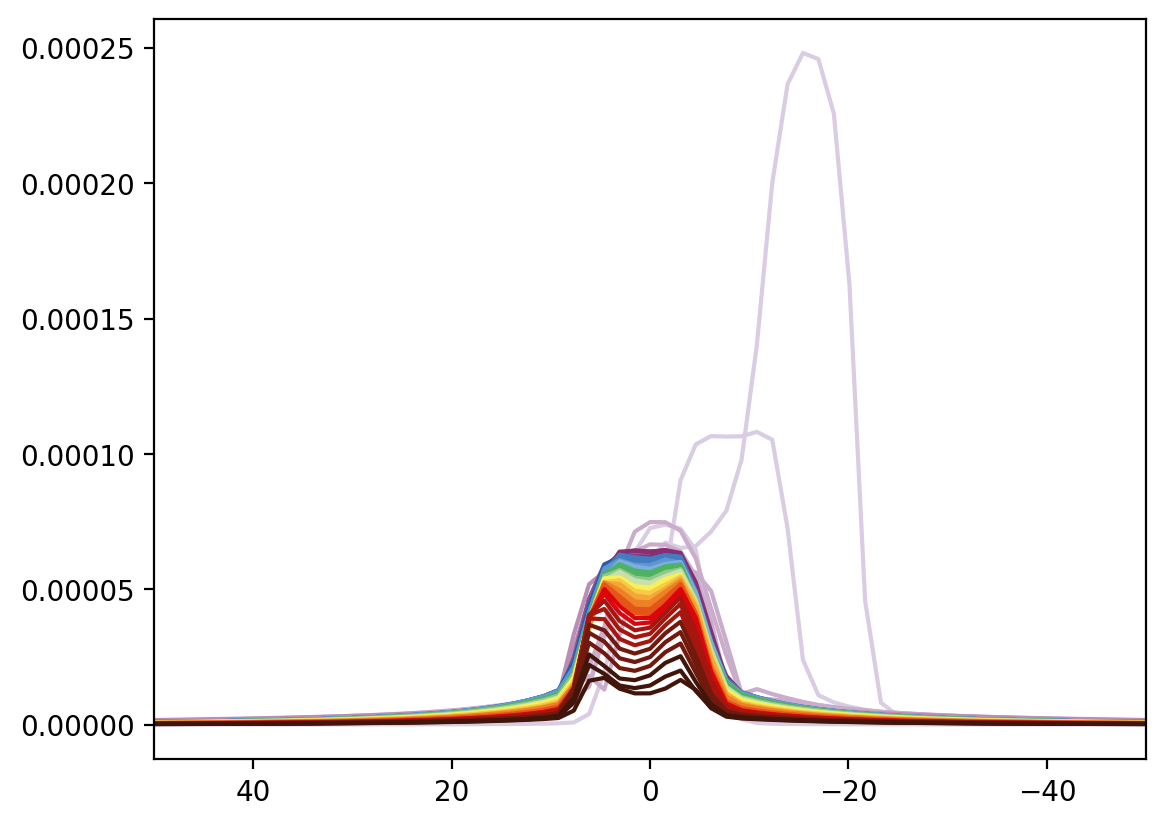

In [36]:
fig,ax=plt.subplots(dpi=200)

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax.plot(freq,caii_h[samples[i],:]-caii_h[0,:],c=cmap_choice2[i],label=i)
#ax.legend()
ax.set_xlim([-50,50])
ax.invert_xaxis()

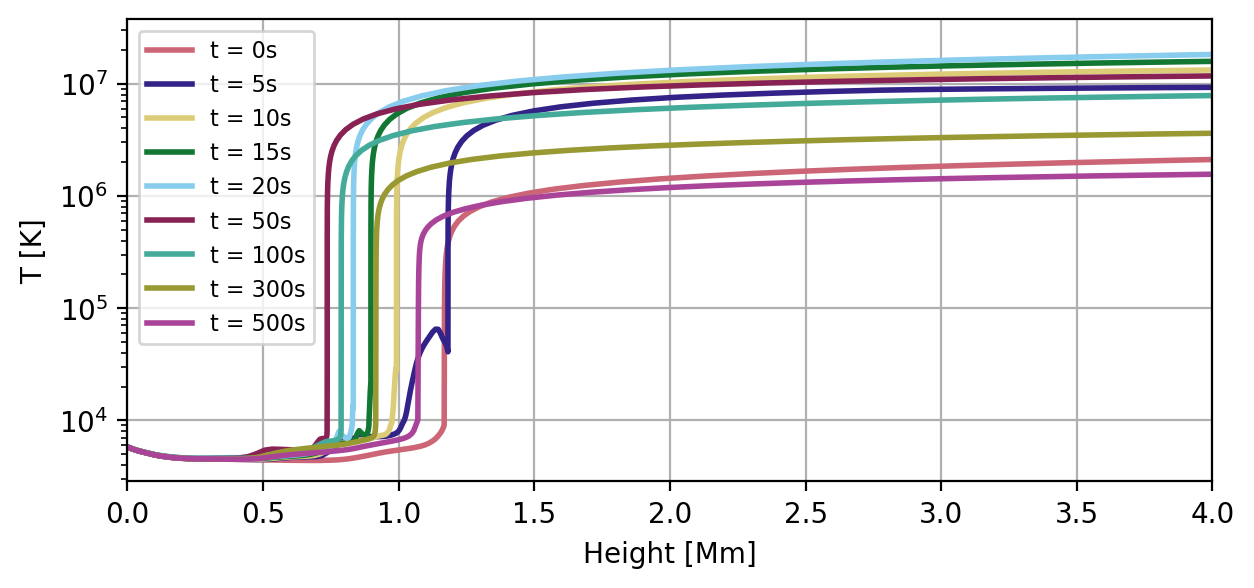

In [75]:
timesinit=[0,5,10,15,20,50,100,300,500]

ncol2 = len(timesinit)#+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))

cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
                    '#000000']

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(z1t[int(timesinit[i]),:]/1e8,(tg1t[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
ax.legend(fontsize=8)
ax.set_ylabel('T [K]')
ax.set_xlabel('Height [Mm]')
ax.set_xlim([0,4])
plt.yscale('log')

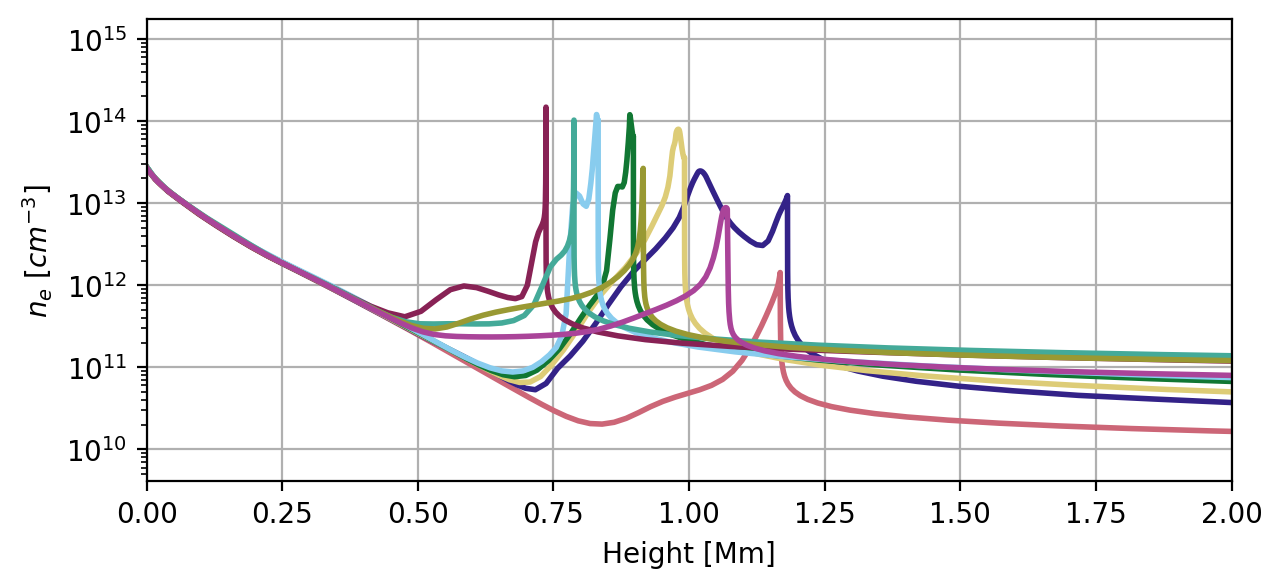

In [87]:
timesinit=[0,5,10,15,20,50,100,300,500]

ncol2 = len(timesinit)#+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))

cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
                    '#000000']

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(z1t[int(timesinit[i]),:]/1e8,(ne1t[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
#ax.legend(fontsize=8)
ax.set_ylabel(r'$n_e$ [$cm^{-3}$]')
ax.set_xlabel('Height [Mm]')
ax.set_xlim([0,2])
plt.yscale('log')

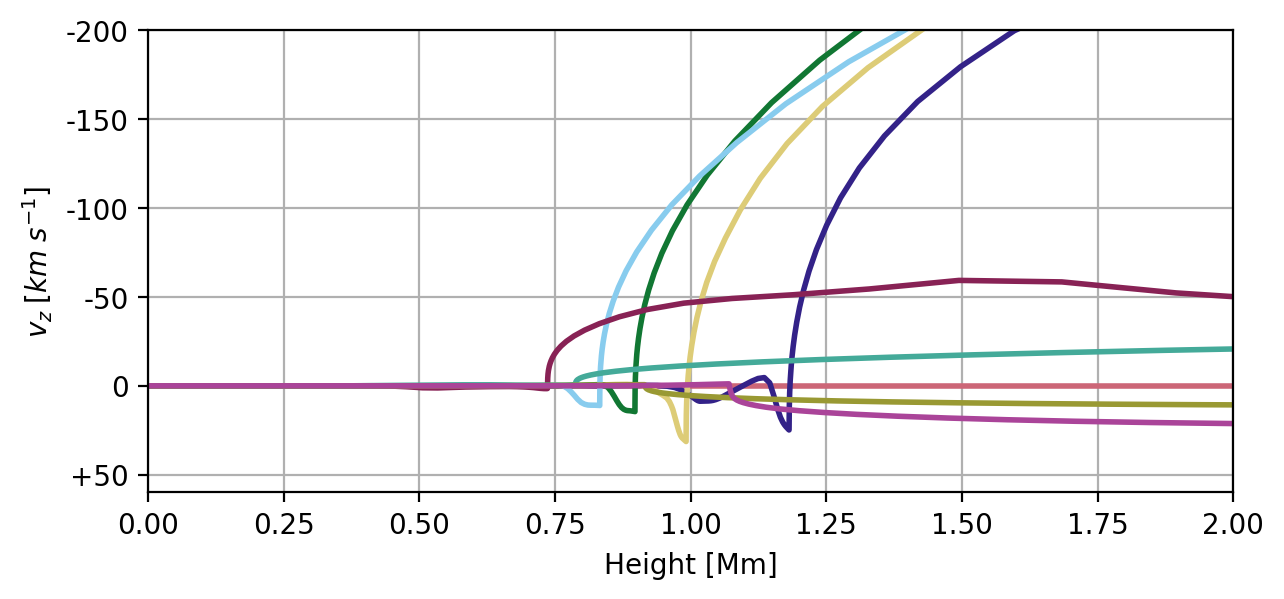

In [86]:
timesinit=[0,5,10,15,20,50,100,300,500]

ncol2 = len(timesinit)#+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))

cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
                    '#000000']

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(z1t[int(timesinit[i]),:]/1e8,(vz1t[int(timesinit[i]),:])/1e5,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['ne1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
#ax.legend(fontsize=8,loc='lower left')
ax.set_ylabel(r'$v_z\; [km\;s^{-1}]$')
ax.set_xlabel('Height [Mm]')
ax.set_xlim([0,2])
ax.set_ylim([-60,200])
ax.set_yticks([-50,0,50,100,150,200],labels=['+50','0','-50','-100','-150','-200'])
#plt.yscale('log')

In [67]:
np.shape(timesinit)

(30,)

(0.0, 610.0)

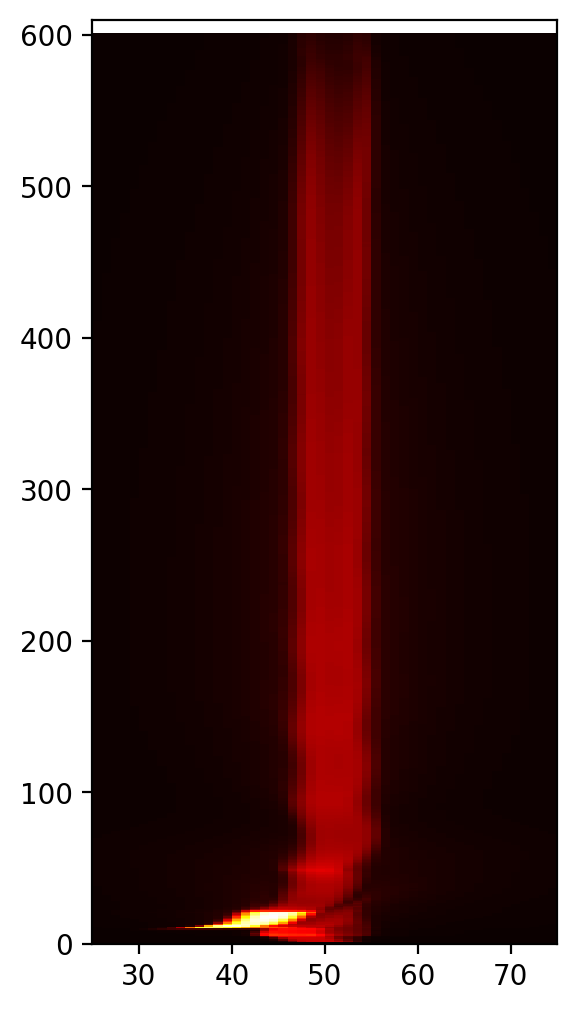

In [100]:


fig,ax=plt.subplots(dpi=200,figsize=(3,6))
ax.pcolormesh(caii_h[:]-caii_h[0,:],cmap='hot')
ax.set_xlim([25,75])
ax.set_ylim([0,610])

In [109]:
!pip install matplotlib-label-lines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.2/826.2 kB 13.4 MB/s eta 0:00:00


[]

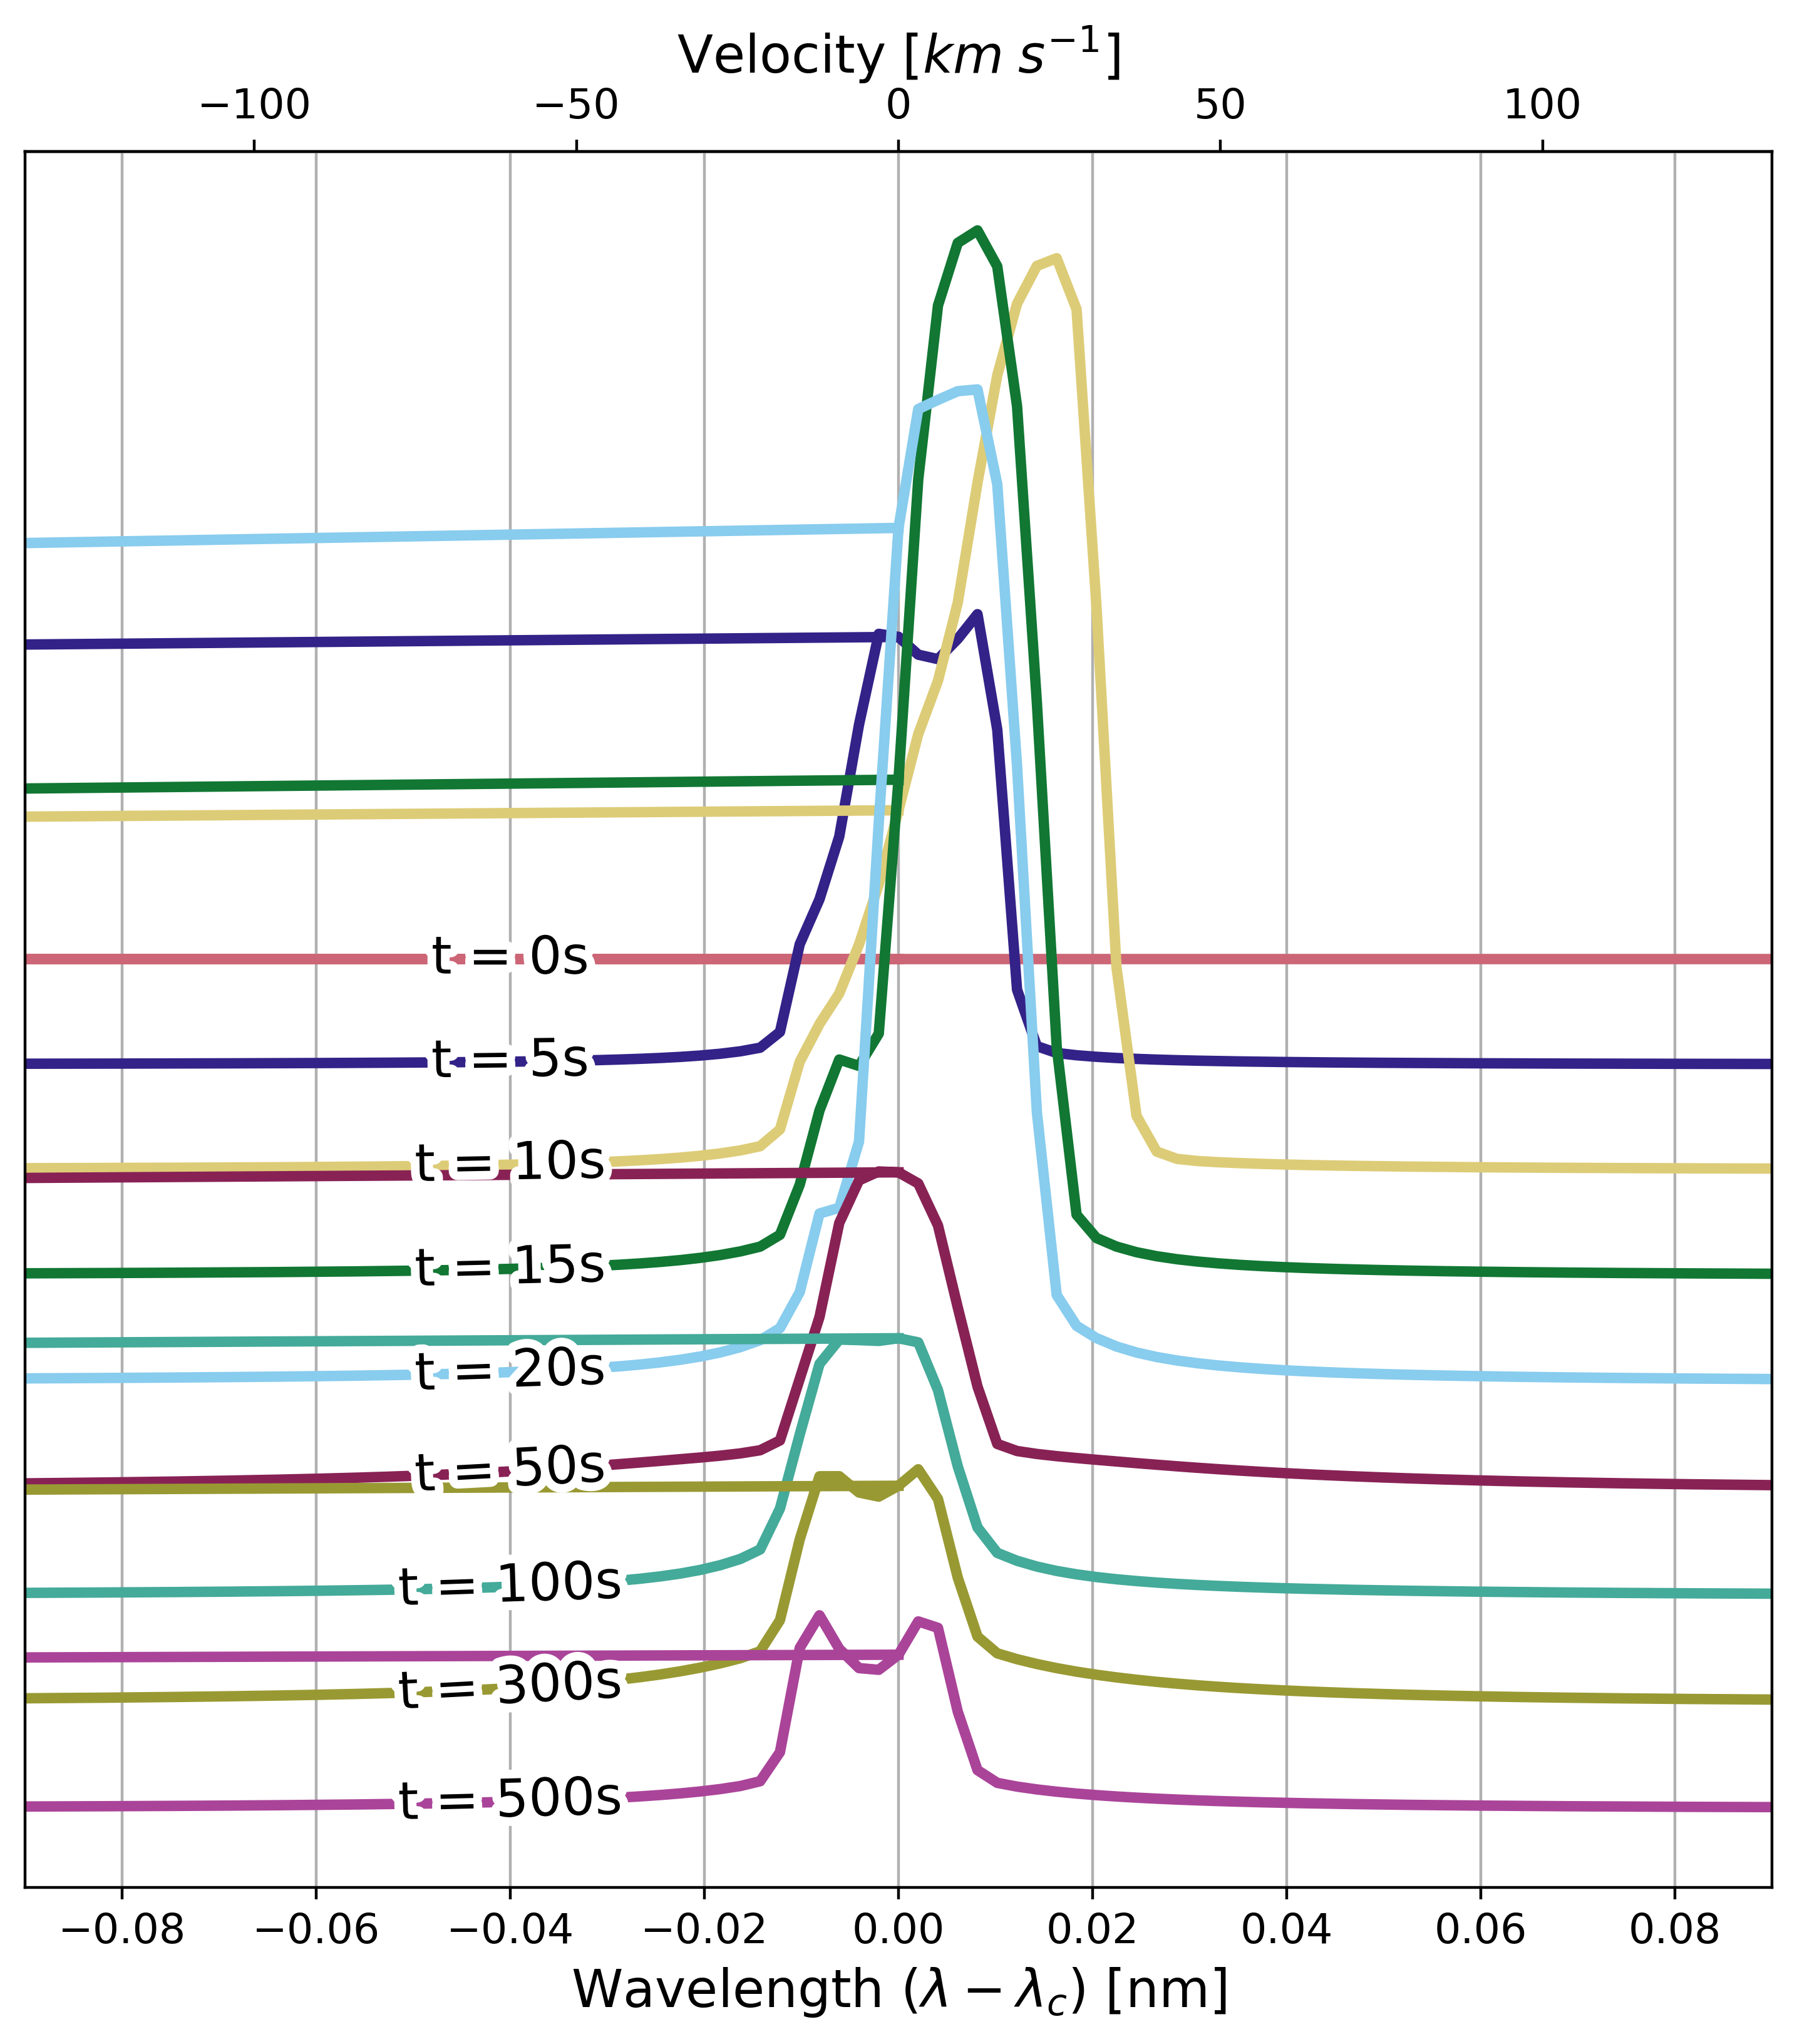

In [117]:
from labellines import *
cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
                    '#000000']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))

wavelengths = (doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm))

fig,ax=plt.subplots(figsize=(9,9),dpi=400)
for i in range(len(timesinit)):
    #if i==2:
    #    #ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),marker='o',color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
    #    ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),color=cmap_choice2[-i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)

    #else:
    ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),color=cmap_choice2[i],label='t = '+str(round(timesinit[i],2))+'s',linewidth=3)
       
    ax.set_xlim([.09,-.09])
xvals = np.zeros(30)
for i in range(len(xvals)):
    xvals[i] = -0.04
labelLines(plt.gca().get_lines(),align=True,xvals=xvals,color='k',fontsize=15)

#for i in range(len(times2)):
#    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
plt.gca().invert_xaxis()
#ax.legend()
#ax.axvline(0,c='black')
ax.grid()
#ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
secaxx.tick_params(axis='both', which='major', labelsize=12)
#ax.yaxis.
ax.yaxis.set_ticks([])

In [97]:
times

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18